In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodiffeq import diff
from neurodiffeq.ode import solve_system, solve, Monitor, InitialValueProblem, TwoPointDirichletBoundaryCondition 

# Background on Differential Equations
What is the purpose of the software?

What kinds of problems can it solve?  Answer:  ODEs and PDEs.

## ODEs
Types of ODEs: IVPs and BVPs

### IVPs
Give some mathematical background and notiation

### BVPs
Same

## PDEs

---

# Basic Usage

The `solve` function is for solving single ODEs. At least 4 things will need to be specified: 

1. `ode` should be a function that maps $(x, t)$ to $F(x, t)$. Suppose we are solving $$F(x, t)=\dfrac{dx}{dt}-x=0,$$ then `ode` should be `lambda x, t: diff(x, t) - x`. `diff` has a order keyword to set the order of the derivative.

2. `condition` is a `neurodiffeq.ode.Condition` instance. We currently support `InitialValueProblem` and `TwoPointDirichletBoundaryCondition`. Here we use `InitialValueProblem(t_0=0.0, x_0=1.0)` to ensure $x(t=0.0)=1.0$.

3. `t_min` and `t_max` are the domain of $t$ to solve the ODE on.

If we want to see the current solution and loss in real time, we need to pass a `Monitor` to `solve`. We need to specify which region we want to monitor by `t_min` and `t_max` as well as the frequency of reporting (one report per `check_every` epochs). This requires the `%matplotlib notebook` command.

# Example 1: Exponential Decay
Start by solving $$\dfrac{dx}{dt} = \lambda x$$ for $x(t)$ with $x(0) = x_{0}$.

<IPython.core.display.Javascript object>


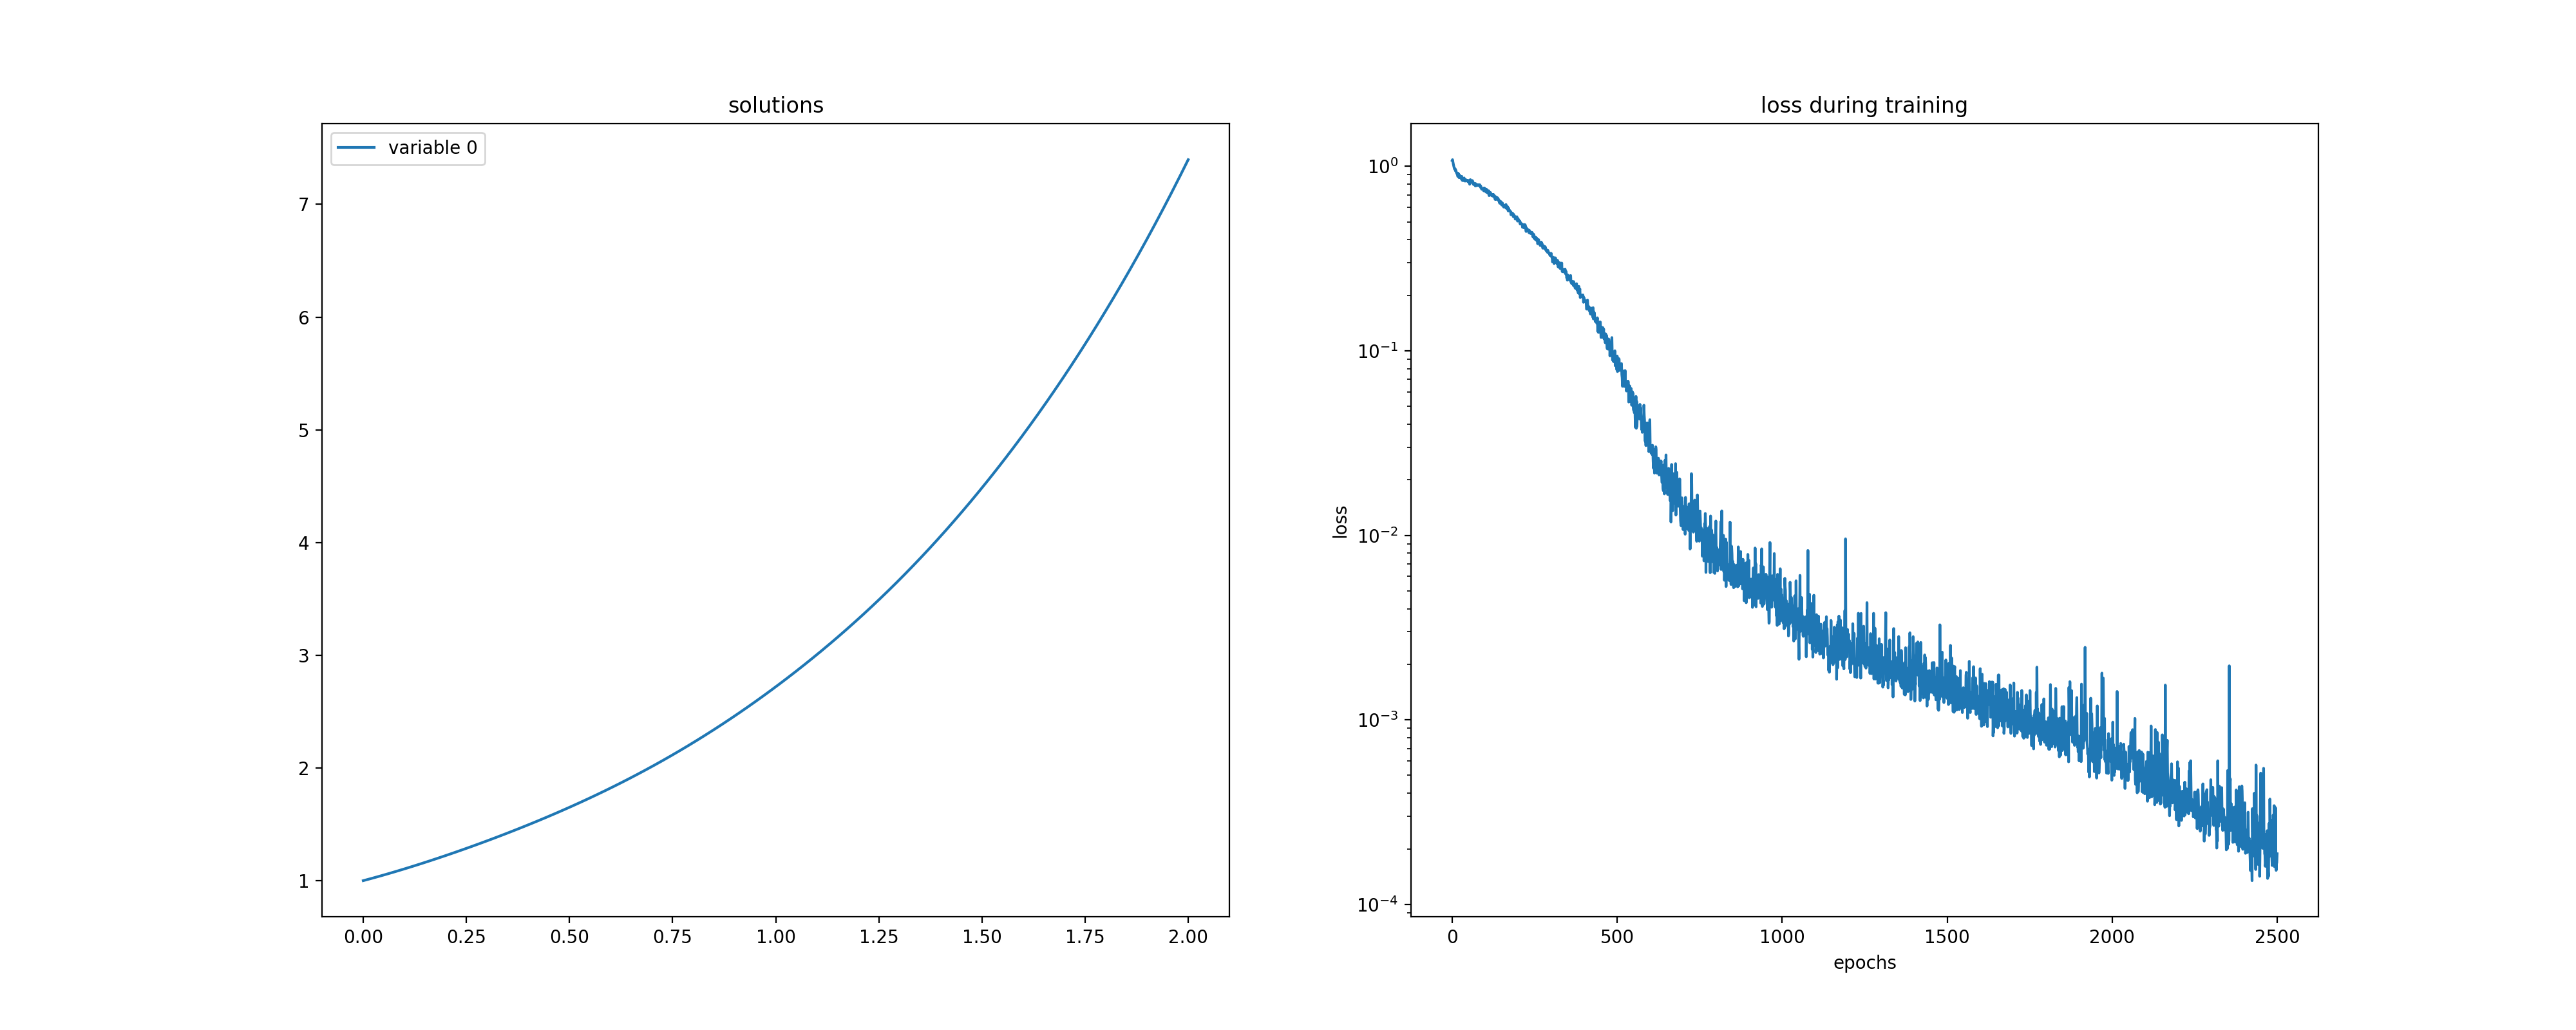

In [2]:
exponential = lambda x, t: diff(x, t) - x # specify the ODE
init_val_ex = InitialValueProblem(t_0=0.0, x_0=1.0) # specify the initial conditon

# solve the ODE
%matplotlib notebook
solution_ex, _ = solve(ode=exponential, condition=init_val_ex, 
                       t_min=0.0, t_max=2.0, 
                       monitor=Monitor(t_min=0.0, t_max=2.0, check_every=100))

### DLS:  Compare with analytical solution

A tuple will be returned, where the first entry is the solution and the second entry is the loss history. The solution is a function that maps $t$ to $x$. It accepts `numpy.array` as well.

<IPython.core.display.Javascript object>


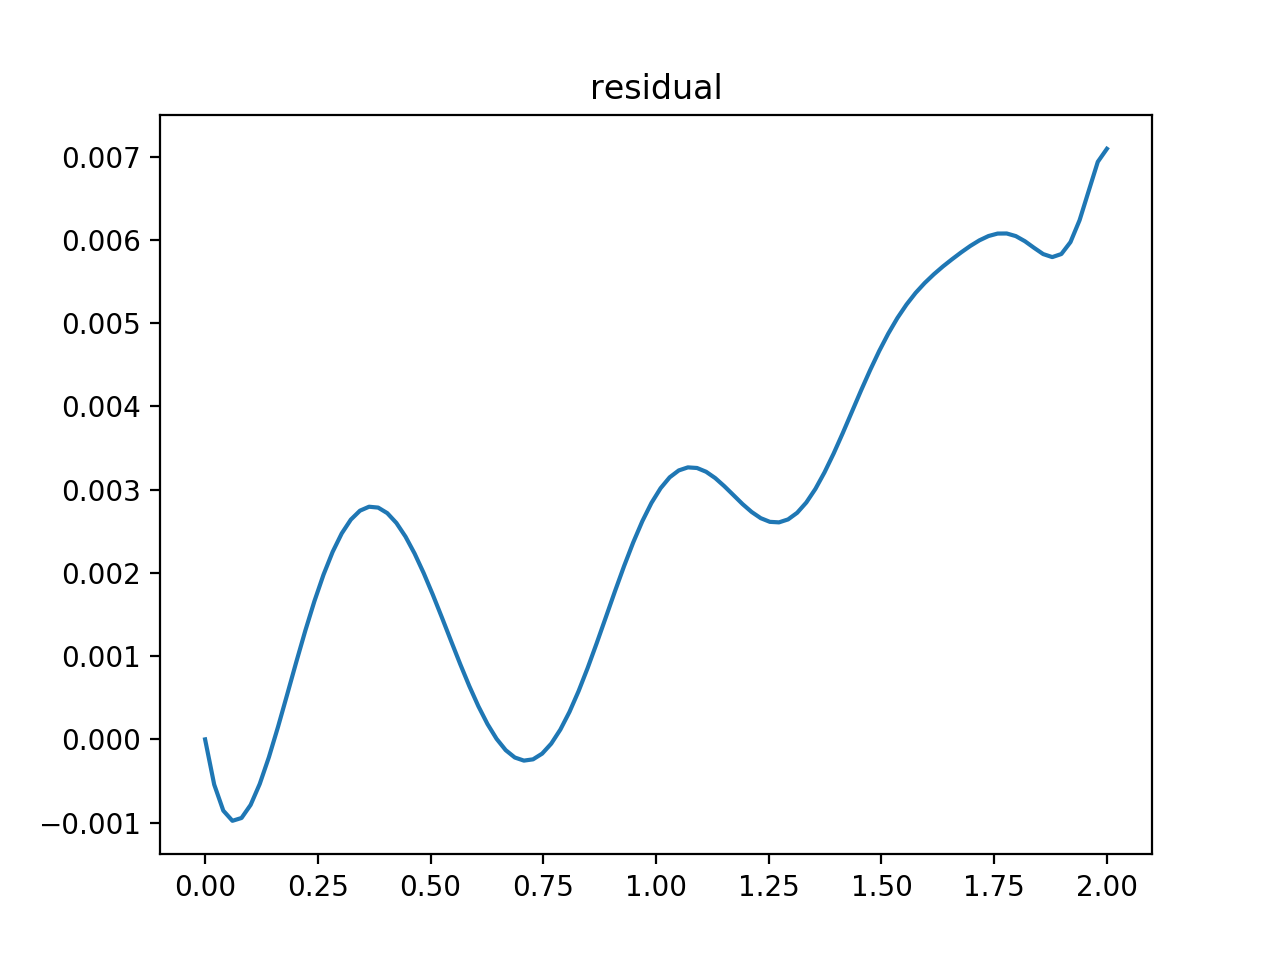

In [3]:
ts = np.linspace(0, 2.0, 100)
x_net = solution_ex(ts)
x_ana = np.exp(ts)

plt.figure()
plt.plot(ts, x_net-x_ana)
plt.title('residual')
plt.show()

## Systems of ODEs

The `solve_system` function is for solving ODE systems. The signature is almost the same as `solve` except that we specify a `ode_system` and a set of `conditions`. 

If the ODE system is $F_i(x, y, ... t) = 0$ for $i = 0, 1, ..., n-1$ where $x, y, ...$ are dependent variables and $t$ is the independent variable, then `ode_system` should map $(x, y, ... t)$ to a list where the $i^{th}$ entry is $F_i(x, y, ... t)$.

`conditions` are the initial value/boundary conditions as a list of Condition instance. They should be in an order such that the first condition constraints the first variable in $F_i$'s (see above) signature. The second the second, and so on.

Here we solve

$$\begin{align}
x_1^{'} - x_2 &= 0 \\
x_2^{'} + x_1 &= 0 \\
x_1(0) &= 0 \\
x_2(0) &= 1
\end{align}$$

<IPython.core.display.Javascript object>


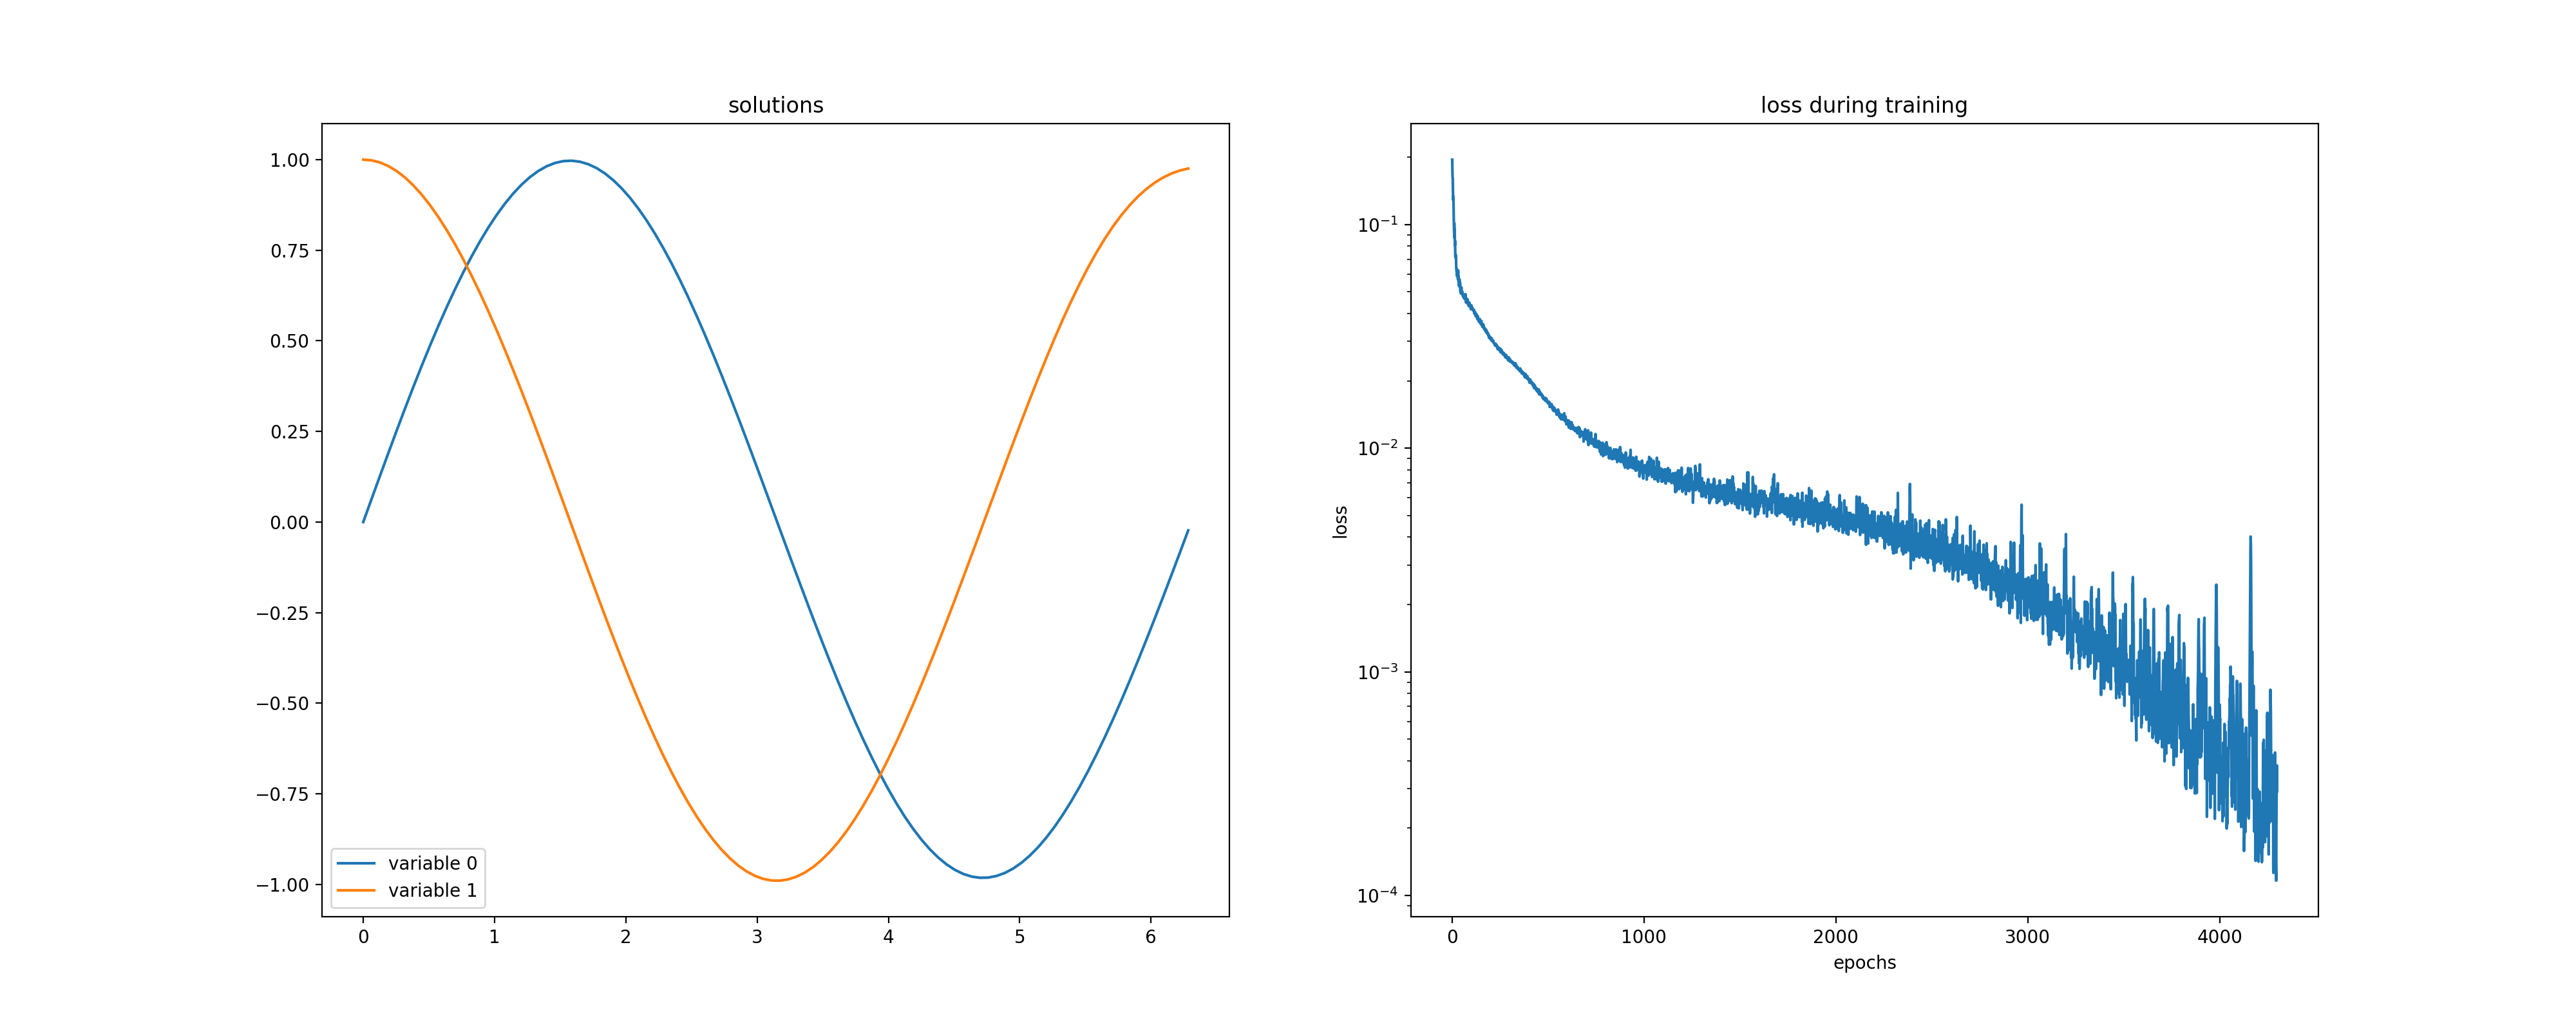

In [4]:
# specify the ODE system
parametric_circle = lambda x1, x2, t : [diff(x1, t) - x2, 
                                        diff(x2, t) + x1]
init_vals_pc = [
    InitialValueProblem(t_0=0.0, x_0=0.0),
    InitialValueProblem(t_0=0.0, x_0=1.0)
]

# solve the ODE system
solution_pc, _ = solve_system(ode_system=parametric_circle, 
                              conditions=init_vals_pc, 
                              t_min=0.0, t_max=2*np.pi,
                              monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

A tuple will be returned, where the first entry is the solution and the second entry is the loss history. The solution is a function that maps $t$ to a list where the $j^{th}$ entry is the value of the $j^{th}$ dependent vairable in $F_i$'s (see above) signature. It accepts `numpy.array` as well.

<IPython.core.display.Javascript object>


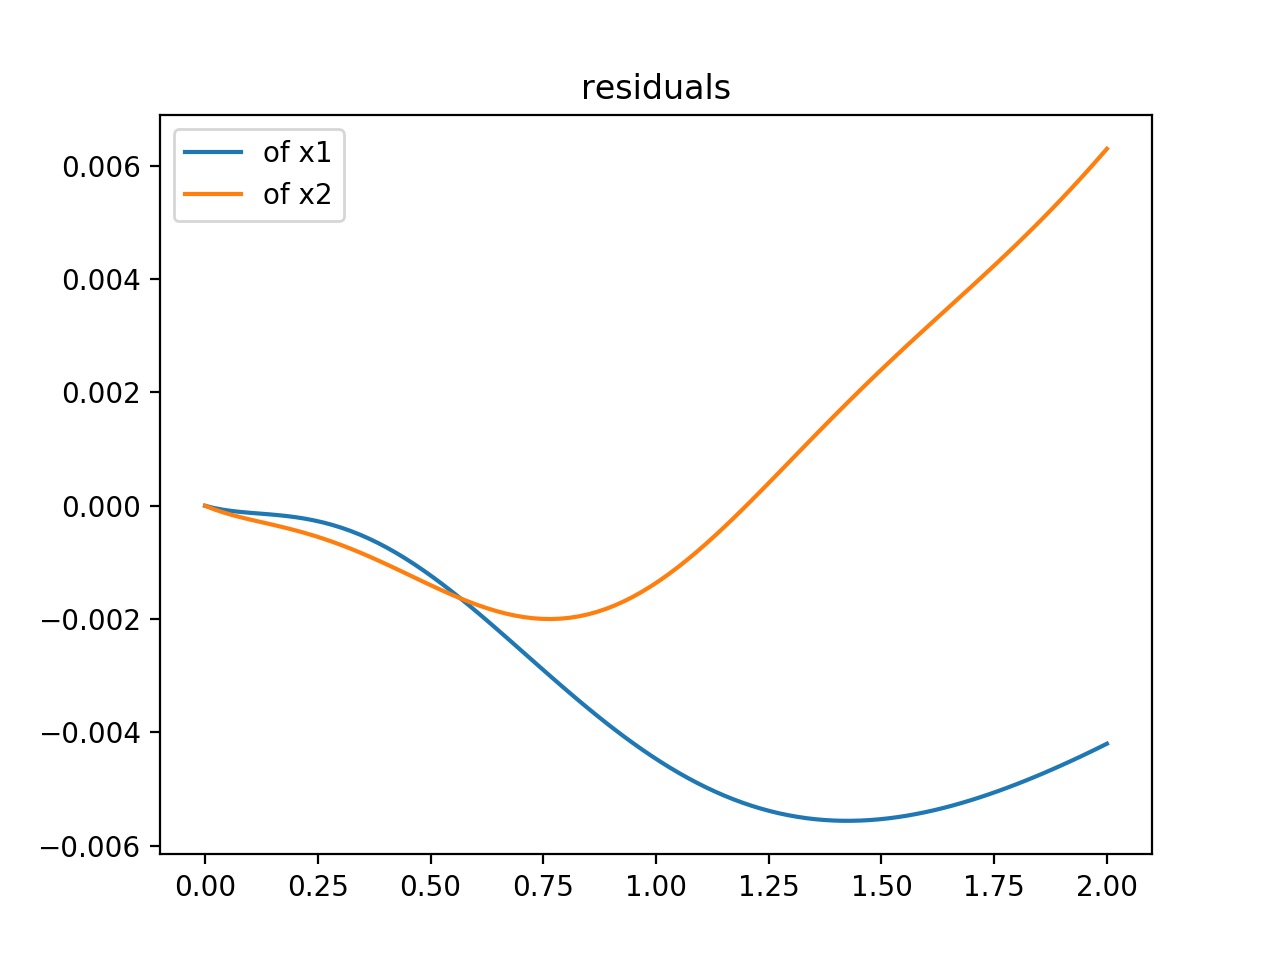

In [5]:
ts = np.linspace(0, 2.0, 100)
x1_net, x2_net = solution_pc(ts)
x1_ana, x2_ana = np.sin(ts), np.cos(ts)

plt.figure()
plt.plot(ts, x1_net-x1_ana, label='of x1')
plt.plot(ts, x2_net-x2_ana, label='of x2')
plt.legend()
plt.title('residuals')
plt.show()